# Iteration 5: Model selection

Don't forget: Before testing fancy models, make sure to define and test a reasonable intuition model to have a proper baseline!

## Load data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
#df = pd.read_csv('./data/housing_iteration_3_classification.csv')
df = pd.read_csv('./data/housing-classification_competition.csv')
df.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [3]:
#df.info()

In [4]:
for col in df.select_dtypes(exclude="number").columns:
    #print(df[col].value_counts())
    pass

In [5]:
id = df.pop('Id')
y = df.pop('Expensive')

In [6]:
X = df.copy()
X = X.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1)

## Train-test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                   random_state=42)

In [8]:
#X_train.info()

## Build Pipeline

### Define preprocessing steps

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [10]:
# select categorical and numerical column names
X_cat_columns = X.select_dtypes(exclude="number").columns
X_num_columns = X.select_dtypes(include="number").columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = Pipeline(
    steps=[('num_imputer', SimpleImputer()), 
           ('num_scaler', MinMaxScaler())
          ])

 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = Pipeline(
    steps=[('cat_imputer', SimpleImputer(strategy='constant', 
                                         fill_value='na')), 
           ('cat_encoder', OneHotEncoder(drop='first', 
                                         sparse_output=False, 
                                         handle_unknown='ignore'#,infrequent_if_exist', 
                                         #min_frequency=0.03
                                        ))
          ])

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipe, X_num_columns), 
        ('cat', categoric_pipe, X_cat_columns)
    ])

In [12]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('num_scaler',
                                                  MinMaxScaler())]),
                                 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2',...
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object'))])

### Define classifiers to test

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [14]:
classifiers = [
    ('DecisionTree', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('LogReg', LogisticRegression()),
    ('RandomForest', RandomForestClassifier()), # slow...
    ('GradientBoosting', GradientBoostingClassifier()), # slow...
    ('SVM', SVC())
]

### Create a pipeline for each classifier

In [15]:
pipelines = []
for name, clf in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', clf)]).set_output(transform='pandas')
    pipelines.append((name, pipe))


In [16]:
pipelines[0][1]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnr...
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

## Exploratory hyperparameter search

### Define exploratory hyperparameters

In [17]:
param_grids_explore = {
    'DecisionTree': {
        'classifier__max_depth': range(2, 25, 2),
        'classifier__min_samples_leaf': range(3, 25, 3),
        'classifier__min_samples_split': range(3, 30, 5),
        #'classifier__criterion': ['gini', 'entropy', 'log_loss']
    },
    'KNN': {
        'classifier__n_neighbors': range(3, 33, 5),
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['minkowski', 'manhattan'],
    },
    'LogReg': {
        'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
        'classifier__C': [0.1, 0.5, 1, 5, 10],
    },
    'RandomForest': {
        'classifier__n_estimators': [30, 50, 80],
        'classifier__max_depth': [5, None],
        'classifier__min_samples_leaf':  [2, 3, 5], 
        'classifier__min_samples_split': [2, 3, 5], 
        'classifier__max_features': ['sqrt', 'log2', None], 
        #'classifier__criterion': ['gini', 'entropy', 'log_loss']
    },
    'GradientBoosting': {
        'classifier__n_estimators': [150, 200, 250],
        #'classifier__loss': ['log_loss', 'exponential'], 
        'classifier__learning_rate': [0.07, 0.1, 0.2],
        'classifier__max_depth': [6, 7, 8],
        'classifier__min_samples_split': [15, 20, 25]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10, 100, 200, 500, 1000],
        'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'classifier__gamma': ['auto'],
        'classifier__degree': [1, 2, 3, 4, 5],
    }
}


### Fit and evaluate models

In [18]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [19]:
# Fit and evaluate each pipeline
scores_explore = {}
params_explore = {}

fit_models = True # for turning off costly exploratory fitting

for name, pipe in pipelines:
    print(f"\nTraining and evaluating {name}...")
    grid_search = GridSearchCV(pipe, 
                               param_grids_explore[name], 
                               cv=5, scoring='accuracy',
                              verbose=2)
    
    if fit_models == True:
        grid_search.fit(X_train, y_train)
        
        # Evaluate on test set
        #y_pred = grid_search.predict(X_test)
        #accuracy = accuracy_score(y_test, y_pred)
        
        print("Best parameters found:")
        print(grid_search.best_params_)
        #print("Classification report:")
        #print(classification_report(y_test, y_pred))
        #print(f"Accuracy: {accuracy:.4f}")
        
        scores_explore[name] = grid_search.best_score_
        params_explore[name] = grid_search.best_params_


Training and evaluating DecisionTree...
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END classifier__max_depth=2, classifier__min_samples_leaf=3, classifier__min_samples_split=3; total time=   0.1s
[CV] END classifier__max_depth=2, classifier__min_samples_leaf=3, classifier__min_samples_split=3; total time=   0.1s
[CV] END classifier__max_depth=2, classifier__min_samples_leaf=3, classifier__min_samples_split=3; total time=   0.1s
[CV] END classifier__max_depth=2, classifier__min_samples_leaf=3, classifier__min_samples_split=3; total time=   0.1s
[CV] END classifier__max_depth=2, classifier__min_samples_leaf=3, classifier__min_samples_split=3; total time=   0.1s
[CV] END classifier__max_depth=2, classifier__min_samples_leaf=3, classifier__min_samples_split=8; total time=   0.1s
[CV] END classifier__max_depth=2, classifier__min_samples_leaf=3, classifier__min_samples_split=8; total time=   0.1s
[CV] END classifier__max_depth=2, classifier__min_samples_leaf=3, cla

In [20]:
scores_explore

{'DecisionTree': 0.933208613036939,
 'KNN': 0.9280767396647225,
 'LogReg': 0.9486262426176589,
 'RandomForest': 0.9503393125710723,
 'GradientBoosting': 0.9563442280180476,
 'SVM': 0.9469351821283152}

In [21]:
params_explore

{'DecisionTree': {'classifier__max_depth': 10,
  'classifier__min_samples_leaf': 6,
  'classifier__min_samples_split': 3},
 'KNN': {'classifier__metric': 'manhattan',
  'classifier__n_neighbors': 8,
  'classifier__weights': 'uniform'},
 'LogReg': {'classifier__C': 1, 'classifier__penalty': 'l2'},
 'RandomForest': {'classifier__max_depth': None,
  'classifier__max_features': 'sqrt',
  'classifier__min_samples_leaf': 3,
  'classifier__min_samples_split': 2,
  'classifier__n_estimators': 50},
 'GradientBoosting': {'classifier__learning_rate': 0.1,
  'classifier__max_depth': 7,
  'classifier__min_samples_split': 20,
  'classifier__n_estimators': 250},
 'SVM': {'classifier__C': 1000,
  'classifier__degree': 1,
  'classifier__gamma': 'auto',
  'classifier__kernel': 'poly'}}

## Refined hyperparameter search

### Define exploratory hyperparameters

In [25]:
param_grids_refined = {
    'DecisionTree': {
        'classifier__max_depth': range(5, 14),
        'classifier__min_samples_leaf': range(3, 9),
        'classifier__min_samples_split': range(3, 14),
        #'classifier__criterion':['gini', 'entropy']
    },
    'KNN': {
        'classifier__n_neighbors': range(4, 14),
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['minkowski', 'manhattan'],
    },
    'LogReg': {
        'classifier__penalty': ['l2'],
        'classifier__C': [0.7, 0.8, 0.9, 1, 2, 3, 4], 
    },
    'RandomForest': {
        'classifier__n_estimators': [30, 50, 80],
        'classifier__max_depth': [None],
        'classifier__min_samples_leaf':  [2, 3, 4], 
        'classifier__min_samples_split': [2, 3, 4], 
        'classifier__max_features': ['sqrt'], 
        #'classifier__criterion': ['gini', 'entropy', 'log_loss']
    },
    'GradientBoosting': {
        'classifier__n_estimators': [250],
        #'classifier__loss': ['log_loss', 'exponential'], 
        'classifier__learning_rate': [0.1],
        'classifier__max_depth': [6, 7, 8],
        'classifier__min_samples_split': [15, 20, 25]
    },
    'SVM': {
        'classifier__C': [500, 1000, 2000],
        'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'classifier__gamma': ['auto'],
        'classifier__degree': [1, 2, 3, 4, 5],
    }
}

### Fit and evaluate models

In [26]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [27]:
# Fit and evaluate each pipeline
scores_refined = {}
params_refined = {}
accuracy_train = {}
estimators = {}

for name, pipe in pipelines:
    print(f"\nTraining and evaluating {name}...")
    grid_search = GridSearchCV(pipe, 
                               param_grids_refined[name], 
                               cv=5, scoring='accuracy',
                              verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Evaluate on test set
    y_train_pred = grid_search.predict(X_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    
    print("Best parameters found:")
    print(grid_search.best_params_)
    #print("Classification report:")
    #print(classification_report(y_test, y_pred))
    print(f"Accuracy for training data: {acc_train:.4f}")
    
    scores_refined[name] = grid_search.best_score_
    params_refined[name] = grid_search.best_params_
    estimators[name] = grid_search.best_estimator_
    accuracy_train[name] = acc_train


Training and evaluating DecisionTree...
Fitting 5 folds for each of 594 candidates, totalling 2970 fits
Best parameters found:
{'classifier__max_depth': 6, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 6}
Accuracy for training data: 0.9675

Training and evaluating KNN...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters found:
{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}
Accuracy for training data: 1.0000

Training and evaluating LogReg...
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters found:
{'classifier__C': 0.7, 'classifier__penalty': 'l2'}
Accuracy for training data: 0.9726

Training and evaluating RandomForest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:
{'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 4, 'classifier__n

In [28]:
scores_refined

{'DecisionTree': 0.9400792340706504,
 'KNN': 0.9289277722754117,
 'LogReg': 0.9486299108616706,
 'RandomForest': 0.9494882799603829,
 'GradientBoosting': 0.9537691207219104,
 'SVM': 0.9469351821283152}

In [29]:
params_refined

{'DecisionTree': {'classifier__max_depth': 6,
  'classifier__min_samples_leaf': 4,
  'classifier__min_samples_split': 6},
 'KNN': {'classifier__metric': 'manhattan',
  'classifier__n_neighbors': 9,
  'classifier__weights': 'distance'},
 'LogReg': {'classifier__C': 0.7, 'classifier__penalty': 'l2'},
 'RandomForest': {'classifier__max_depth': None,
  'classifier__max_features': 'sqrt',
  'classifier__min_samples_leaf': 2,
  'classifier__min_samples_split': 4,
  'classifier__n_estimators': 50},
 'GradientBoosting': {'classifier__learning_rate': 0.1,
  'classifier__max_depth': 7,
  'classifier__min_samples_split': 20,
  'classifier__n_estimators': 250},
 'SVM': {'classifier__C': 1000,
  'classifier__degree': 1,
  'classifier__gamma': 'auto',
  'classifier__kernel': 'poly'}}

## Check performance on test data

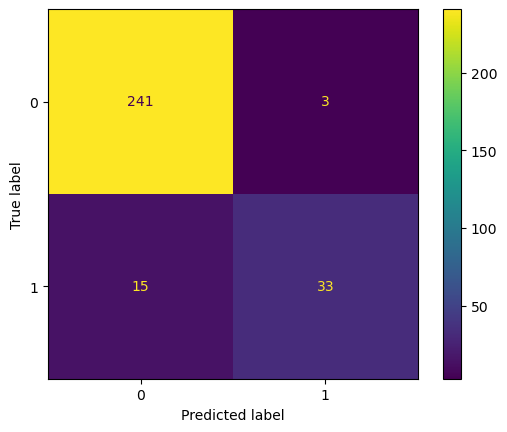

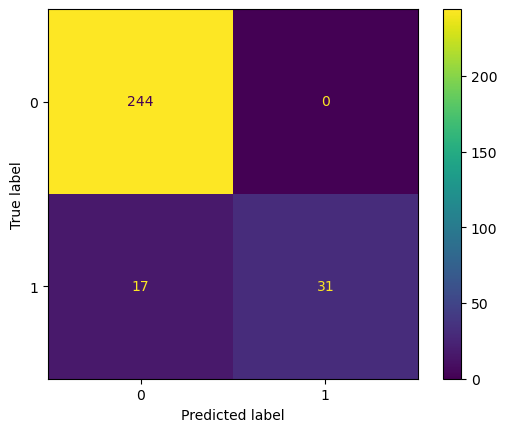

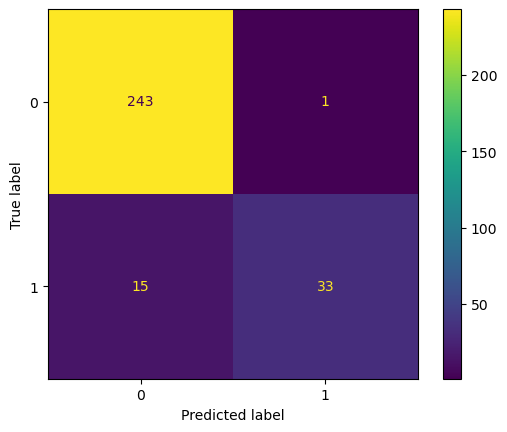

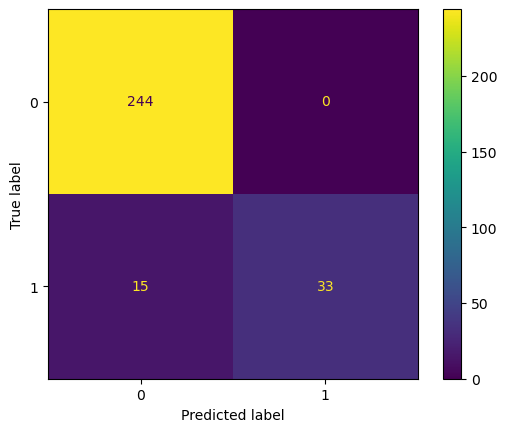

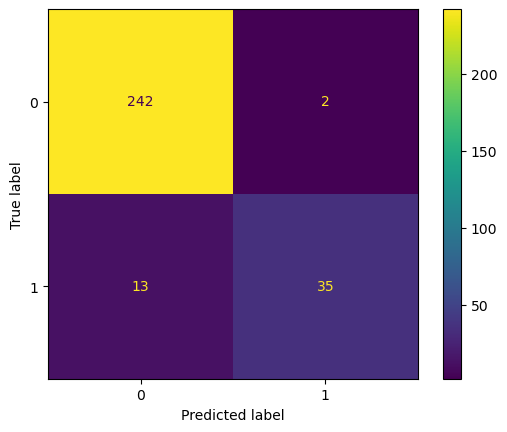

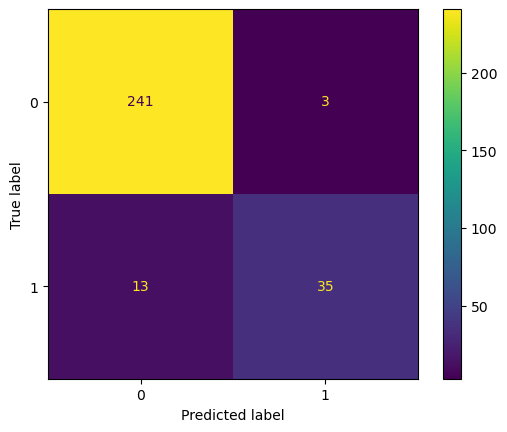

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
accuracy_test = {}

for name in estimators:
    accuracy_test[name] = estimators[name].score(X_test, y_test)
    
    ConfusionMatrixDisplay.from_estimator(estimators[name],
                                      X_test,
                                      y_test,
                                      );

In [32]:
accuracy_test

{'DecisionTree': 0.9383561643835616,
 'KNN': 0.9417808219178082,
 'LogReg': 0.9452054794520548,
 'RandomForest': 0.9486301369863014,
 'GradientBoosting': 0.9486301369863014,
 'SVM': 0.9452054794520548}

In [30]:
#TODO: check more metrics

## Run best model with production data

In [33]:
# load production/comp data
comp = pd.read_csv('./data/test-housing-classification.csv')
comp.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,11622,80.0,882.0,2,0,0,1.0,140,120,RH,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,14267,81.0,1329.0,3,0,0,1.0,393,0,RL,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,13830,74.0,928.0,3,1,0,2.0,212,0,RL,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,9978,78.0,926.0,3,1,0,2.0,360,0,RL,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,5005,43.0,1280.0,2,0,0,2.0,0,144,RL,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [34]:
#comp.info()

In [35]:
id = comp.pop('Id')
comp = comp.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1)

In [36]:
for n in estimators:
    est = estimators[n]
    submission_pred = list(est.predict(comp))
    
    # Create the Dataframe for the submission. It must contain two columns: "Id" and "Expensive"
    submission_df = pd.DataFrame()
    submission_df['Id'] = id
    submission_df['Expensive'] = submission_pred

    submission_df.to_csv(f'./submission/{n}.csv', index=False)
